In [ ]:
# 데이터 복잡도 줄이기
# 데이터를 기본 차원으로 줄일 수만 있다면 개념 간의 기본 관계를 좀 더 명확하게 식별할 수 있다.

# 데이터의 차원 수를 줄여 데이터 복잡성을 줄이는 세 가지 일반적인 방법
# 1. 주성분 분석 PCA : 데이터의 최대 분산을 포착하는 상관되지 않은 선형 차원을 찾기
# 2. 탐색적 요인 분석 EFA: 원시 변수 측면에서 차원을 해석 할 수 있도록 하면서 소수의 차원으로 분산을 포착하려고 시도
# 3. 다차원 스케일링 MDS은 2차원 도면과 같은 저차원 공간 측면에서 관측치 간의 유사성을 매핑
#    MDS는 측도 데이터와 범주형 또는 서수 (ordinal) 데이터와 같은 비측도 데이터와 함꼐 작동할 수 있음.

# 소비자 브랜드 평가 데이터

In [1]:
import pandas as pd
brand_ratings = pd.read_csv('http://bit.ly/PMR-ch9')
brand_ratings.head()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
0,2,4,8,8,2,9,7,4,6,a
1,1,1,4,7,1,1,1,2,2,a
2,2,3,5,9,2,9,5,1,6,a
3,1,6,10,8,3,4,5,2,1,a
4,1,1,5,8,1,9,9,1,1,a


In [2]:
brand_ratings.tail()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy,brand
995,2,2,3,6,4,8,5,1,2,j
996,3,2,6,7,1,3,3,2,1,j
997,1,1,10,10,1,6,5,5,2,j
998,1,1,7,5,1,1,2,5,1,j
999,7,4,7,8,4,1,2,5,1,j


In [4]:
# describe()로 데이터의 품질과 구조 확인
brand_ratings.describe()

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,4.488000,4.417000,6.195000,6.06800,4.323000,4.259000,4.33700,5.220000,3.727000
std,3.203454,2.608432,3.078059,2.74425,2.778199,2.667027,2.39858,2.742101,2.544592
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,1.000000
25%,1.000000,2.000000,4.000000,4.00000,2.000000,2.000000,2.00000,3.000000,1.000000
50%,4.000000,4.000000,7.000000,6.00000,4.000000,4.000000,4.00000,5.000000,3.000000
75%,7.000000,6.000000,9.000000,8.00000,6.000000,6.000000,6.00000,7.000000,5.000000
max,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.00000,10.000000,10.000000


<AxesSubplot:>

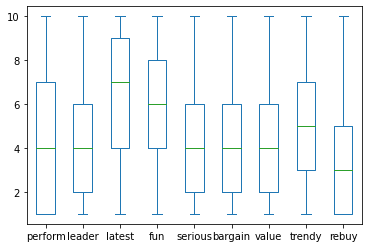

In [5]:
brand_ratings.plot.box()

## 원시 데이터 크기 조정

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-1.09,-1.31,-1.69,-1.85,-1.20,-1.22,-1.39,-1.54,-1.07
25%,-1.09,-0.93,-0.71,-0.75,-0.84,-0.85,-0.97,-0.81,-1.07
50%,-0.15,-0.16,0.26,-0.02,-0.12,-0.10,-0.14,-0.08,-0.29
75%,0.78,0.61,0.91,0.70,0.60,0.65,0.69,0.65,0.50
max,1.72,2.14,1.24,1.43,2.04,2.15,2.36,1.74,2.47


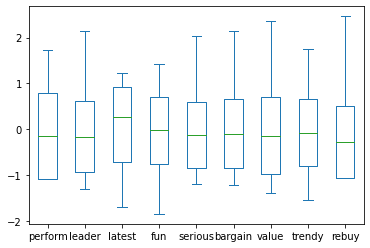

In [9]:
# 원시 데이터는 크기를 조정하는 것이 좋음
# 이를 통해 개인과 샘플 간에 데이터를 더 비교할 수 있음.

# 일반적으로는 (x - x.mean())/x.std()
# 더 간단하게는 sklearn.preprocessing.scale() 사용

from sklearn.preprocessing import scale
brand_ratings_sc = brand_ratings.copy()
brand_ratings_sc.iloc[:, :-1] = scale(brand_ratings_sc.iloc[:,:-1])
brand_ratings_sc.plot.box()
brand_ratings_sc.describe().round(2)

In [10]:
# 초기 탐색에서는 확장되지 않은 데이터를 사용한다. 
# 해석하기 쉽기 때문에 일반적으로 크기 조정되지 않은 데이터로 시작하는 것이 좋다.

# 하지만, 변수 간의 척도 차이는 분석을 복잡하게 만들 수 있다.
# 실제로는 일반적으로 크기 조정되지 않은 데이터와 크기 조정된 데이터에 대해 전체 분석을 실행하고 둘다 평가
# 크기 조정된 데이터는 작업하기에 안전함

# 크기 조정 x -> 차원 축소 분석을 시작할 때 크기 조정된 데이터 이용

## 속성 간의 상관관계

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

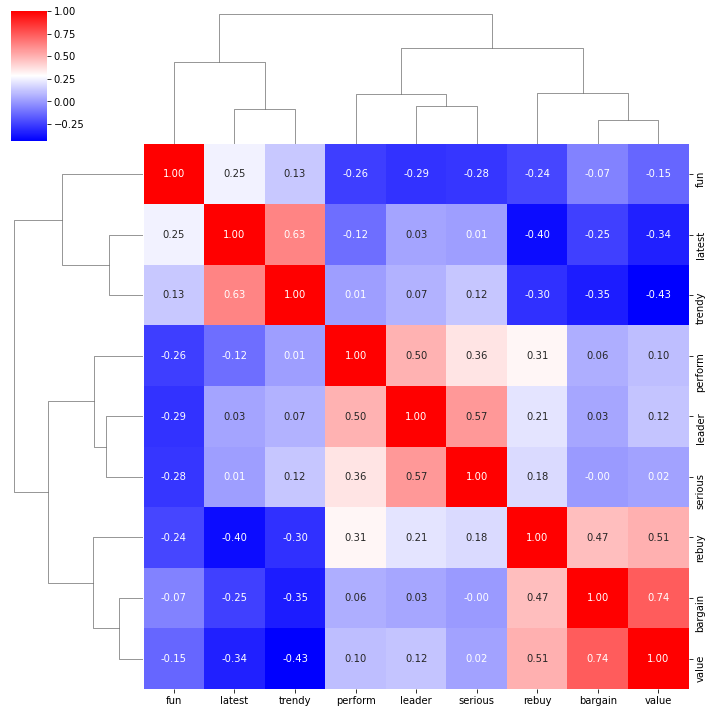

In [12]:
# heatmap 대신 클러스터 맵을을 이용하여
# 계층적 클러스터 솔루션에서 변수의 유사성에 따라 행과 열을 재정렬해 서로 가까운 형용사가 인접하게 표시되도록 하기.
# 여기서는 세 군집으로 그룹화되는 것으로 보임.

sns.clustermap(
    brand_ratings.corr(),
    annot=True,
    fmt='.2f',
    cmap=plt.cm.bwr
)

## 브랜드별 종합 평균 등급

In [13]:
brand_means = brand_ratings.groupby('brand').mean().round(3)
brand_means

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,1.65,3.04,7.46,7.87,1.77,4.83,4.78,3.78,2.21
b,7.47,7.21,8.43,3.40,7.61,4.37,4.70,7.25,4.33
c,6.57,7.45,5.88,3.75,7.72,2.64,3.28,5.29,3.39
d,2.31,2.87,7.28,6.58,2.40,1.91,2.10,7.24,2.47
e,2.68,4.92,7.60,6.88,4.44,5.73,5.34,5.60,3.82
f,4.30,5.12,2.31,5.47,5.96,6.59,6.79,2.99,7.18
g,7.43,3.98,2.24,4.65,2.84,6.65,7.35,1.72,7.19
h,4.44,3.64,7.74,8.03,3.93,2.29,2.46,7.59,2.19
i,5.56,3.58,7.29,7.20,3.91,3.58,2.41,6.84,3.21


<AxesSubplot:ylabel='brand'>

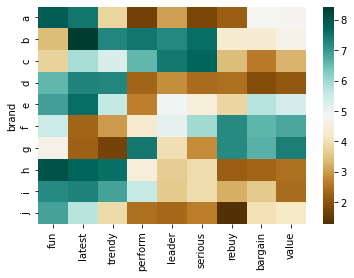

In [20]:
from matplotlib import cm

sns.heatmap(
    brand_means[['fun', 'latest', 'trendy', 'perform', 'leader',
                 'serious', 'rebuy', 'bargain', 'value']],
    cmap=cm.BrBG
)

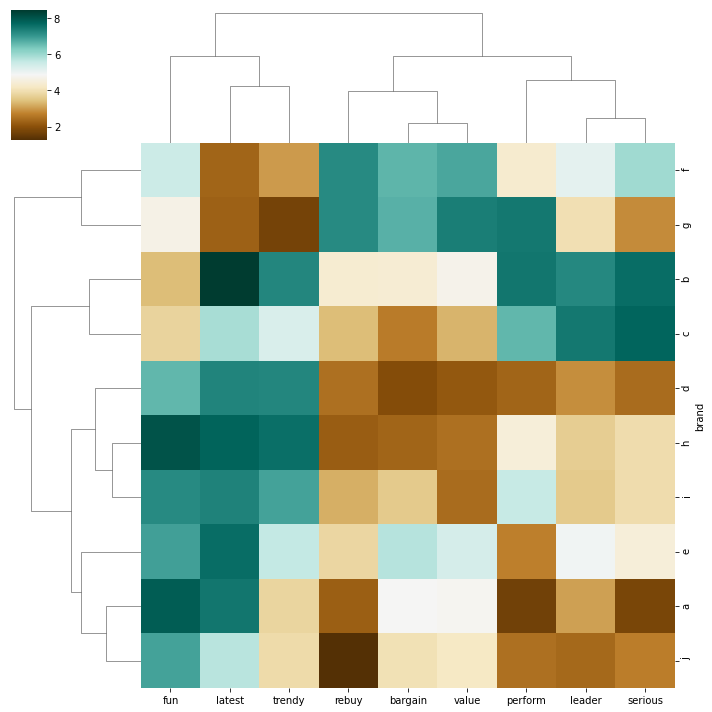

In [21]:
# 클러스터 맵을 통해 데이터의 그룹화를 시각화하는데 도움을 줌. 
# 좀 더 형식적인 클러스터 분석에 대한 좋은 예비 분석. 

# 변수들 간의 cluster를 파악함과 동시에
# 브랜드간의 cluster도 파악가능

sns.clustermap(brand_means, cmap=cm.BrBG)

# 주성분 분석과 지각도

In [22]:
# PCA는 데이터의 선형 관계를 포착하는 성분이라고 불리는 선형 방정식의 항으로
# 변수 집합을 재계산한다.

# 첫번째 성분: 모든 변수에서 가능한 한 많은 분산을 단일 선형 함수로 포착
# 두번째 성분: 첫 성분 이후에 남아있는 가능한 한 많은 분산을 포착
# 이 과정은 변수만큼의 성분이 있을때까지 계속됨.

# 이 프로세를 사용하면 데이터 변동의 많은 부분을 설명하는 첫 번째 성분이나 두 개의 성분과 같이
# 선분의 하위 집합만 유지하고 분석해 데이터의 복잡도를 줄일 수 있음.

## PCA의 예

In [23]:
np.random.seed(98286)
xvar = np.random.randint(low=0, high=10, size=100)
yvar = xvar.copy()
yvar[:50] = np.random.randint(low=0, high=10, size=50)
zvar = yvar.copy()
zvar[25:75] = np.random.randint(low=0, high=10, size=50)
myvars = np.array([xvar, yvar, zvar])

# 관측치 중 50개가 동일하고 50개가 새로 샘플링된 임의 값이기 때문에 yvar은 xvar와 상관된다.
# 마찬가지로 zvar은 yvar에서 50개의 값을 유지하므로 xvar에서 일부를 상속하지만 더 적은 값을 상속한다.
# 이 세 백터를 행렬로 만들기.
# 상관데이터 생성 코드 -> np.random.multivariate_normal()

/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 27.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:>

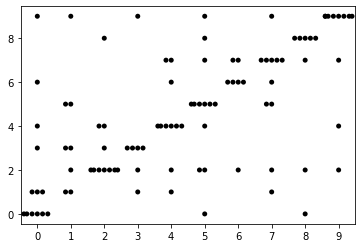

In [24]:
# swarmplot()은 동일한 값을 가진 여러 포인트가 있을 경우,
# 포인트를 조정해 동일한 값에 있는 포인트 수를 확인할 수 있도록 도와줌

sns.swarmplot(
    x=xvar,
    y=yvar,
    color='k'
)

# 해당 이변량 도면은 대각에서 yvar 대 xvar에 대한 명확한 선형 추세를 보여줌

In [26]:
# xvar은 예상대로 yvar과 상관관계가 높고 zvar과는 상관관계가 적으며
# yvar은 zvar과 강한 상관관계를 갖는다.

np.corrcoef(myvars)

array([[1.        , 0.5755755 , 0.23837089],
       [0.5755755 , 1.        , 0.48224687],
       [0.23837089, 0.48224687, 1.        ]])

In [28]:
##################################################
# 직관적으로 데이터의 성분을 유추해볼 수 있음.
# 1. 양의 상관관계가 있기 때문에 세 변수 모두에 걸쳐 공유된 분산이 있음.
#    따라서 세 변수 모두의 연관성을 포착하는 하나의 성분을 볼 수 있을 것으로 예상됨

# 2. 그 후, xvar와 zvar가 yvar보다 서로 더 구별된다는 사실을 보여주는 성분을 볼 것으로 예상.
#    이는 yvar가 다른 두 변수와 높은 상관관계를 갖는 유일한 변수로서 데이터셋에서 고유한 위치를 갖고 있음을 의미하므로
# 3. 마지막으로 성분 중 하나가 yvar의 고유성을 반영할 것으로 예상됨. 

In [29]:
# PCA()
from sklearn import decomposition
my_pca = decomposition.PCA().fit(myvars.T)

In [37]:
# PCA에서 일부 관련 통계를 출력하는 헬퍼 함수

def pca_summary(pca, round_dig=3):
    """PCA 적합화 출력"""
    return pd.DataFrame(
        [pca.explained_variance_,
         pca.explained_variance_ratio_,
         np.cumsum(pca.explained_variance_ratio_)],
        columns=['pc{}'.format(i) for i in range(1, len(pca.explained_variance_ )+1)],
        index=['variance', 'proportion of variance explained',
               'cumulative proportion']
    ).round(round_dig)

pca_summary(my_pca)

# 세가지 변수가 있으므로, 세가지 성분이 있음.

# 첫번째 성분은 설명 가능한 선형 분산의 62%를 차지
# 두번째 성분은 설명 가능한 선형 분산의 27%를 차지
# 세번째 성분은 설명 가능한 선형 분산의 11%를 차지

# 이러한 성분은 변수와 어떻게 관련이 있는지?

,pc1,pc2,pc3
variance,16.473,7.050,3.042
proportion of variance explained,0.620,0.265,0.114
cumulative proportion,0.620,0.886,1.000


In [52]:
# 다른 헬퍼 함수 지정함으로써 회전 행렬 확인
# PCA 회전 적재(rotatino loadings)를 해석하는 것은 다변량 특성으로 인해 어려움.
# 여기에서는 적재를 설명하고 예상과 비교해보기

def pca_components(pca, variable_names):
    """PCA에서 특정 성분에 대한 변수 적재 반환"""
    
    return pd.DataFrame(
        pca.components_, 
        index=['pc{}'.format(i+1) for i in range(len(pca.components_))],
        columns=variable_names
    ).T

my_pca_components = pca_components(my_pca, ['xvar', 'yvar', 'zvar'])
my_pca_components.round(3)

,pc1,pc2,pc3
xvar,-0.544,0.637,0.545
yvar,-0.622,0.129,-0.772
zvar,-0.563,-0.760,0.326


In [53]:
# pca를 사용해 해당 성분에 대한 로딩 측면에서 기본 데이터를 표현하는 각 주성분의 점수를 계산
# pca객체의 transform 메소드 사용

# 추출된 pca 성분은 서로 관련이 없음.
# 그렇지 않다면 포착할 수 있는 더 많은 선형 분산이 있다는 의미.

# 상관관계는 사실상 0
# 변환값

myvars_transformed = my_pca.transform(myvars.T)
np.corrcoef(myvars_transformed.T)

array([[ 1.00000000e+00,  3.27170546e-16,  1.31813085e-16],
       [ 3.27170546e-16,  1.00000000e+00, -2.20862319e-16],
       [ 1.31813085e-16, -2.20862319e-16,  1.00000000e+00]])

In [60]:
my_pca_components.loc['xvar']['pc1']

-0.5443541023158389

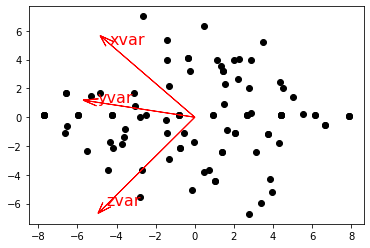

In [55]:
def plot_arrow_component(pca_components, variable, scale=1):
    """PCA 공간에서 성분 차원 화살표 도식화"""
    plt.arrow(
        x=0, y=0,
        dx=pca_components.loc[variable]['pc1'] * scale,
        dy=pca_components.loc[variable]['pc2'] * scale,
        color='r',
        head_width=.5, overhang=1
    )
    plt.text(
        x=pca_components.loc[variable]['pc1'] * scale,
        y=pca_components.loc[variable]['pc2'] * scale,
        s=variable,
        color='r',
        fontsize=16
    )
    
plt.scatter(
    x=myvars_transformed[:,0],
    y=myvars_transformed[:,1],
    color='k'
)
for v in my_pca_components.index:
    plot_arrow_component(my_pca_components, v, 8)

In [56]:
# biplot

def biplot(values_transformed, pca_components, label=[]):
    """PCA 공간에 각 변수의 적재를 나타내는 화살표가 있는 점의 산점도인 biplot을 생성한다.
    포인트는 선택적으로 레이블을 지정할 수 있다"""
    
    scale = 1.2*np.max(values_transformed[:,1])
    plt.figure(figsize=(10,10))
    for v in pca_components.index:
        plot_arrow_component(pca_components, v, scale)
        
    plt.scatter(
        x=values_transformed[:,0],
        y=values_transformed[:,1],
        color='gray', s=4
    )
    
    if len(label) == values_transformed.shape[0]:
        for i, txt in enumerate(label):
            plt.text(
                s=txt, 
                x=values_transformed[i,0]+.01*scale,
                y=values_transformed[i,1]+.01*scale,
                fontsize=14
            )
            
    plt.xlabel('PC1')
    plt.ylabel('PC2')

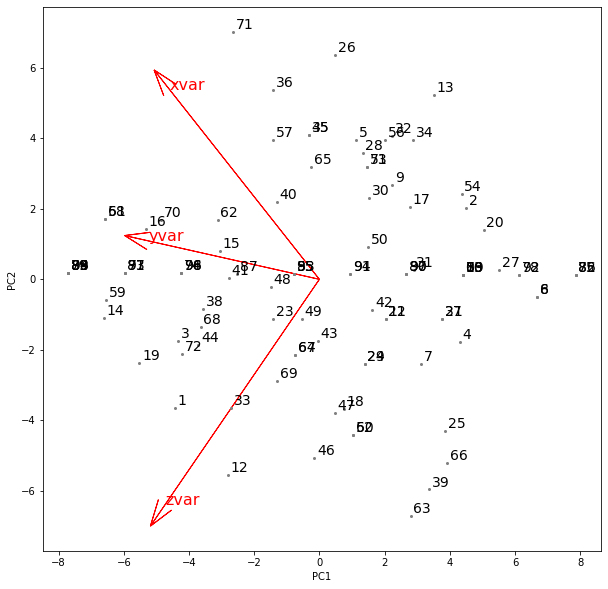

In [57]:
biplot(myvars_transformed, my_pca_components, label=range(myvars.shape[1]))

## PCA 시각화

Text(0.5, 0, 'PC2')

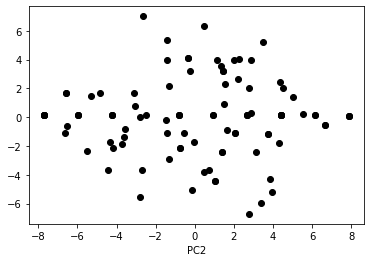

In [42]:
# PCA의 결과를 조사하기 위해 처음 몇 개의 성분을 매핑하기
# 데이터를 저차원 공간에서 시각화할 수 있음

# biplot이라고 불림

import matplotlib.pyplot as plt

plt.scatter(
    x=myvars_transformed[:, 0],
    y=myvars_transformed[:, 1],
    color='k'
)

plt.xlabel('PC1')
plt.xlabel('PC2')

## 브랜드 평가를 위한 PCA

In [46]:
# 브랜드 평가 데이터의 주성분 

brand_ratings_names = brand_ratings_sc.columns[:-1]
brand_ratings_sc_vals = brand_ratings_sc[brand_ratings_names]
brand_pca = decomposition.PCA().fit(brand_ratings_sc_vals)

In [47]:
# pca_summary 사용하여 각 성분에 포함된 분산 확인

pca_summary(brand_pca)

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
variance,2.982,2.099,1.080,0.728,0.638,0.535,0.390,0.312,0.243
proportion of variance explained,0.331,0.233,0.120,0.081,0.071,0.059,0.043,0.035,0.027
cumulative proportion,0.331,0.564,0.684,0.765,0.836,0.895,0.938,0.973,1.000


Text(0, 0.5, 'Variance')

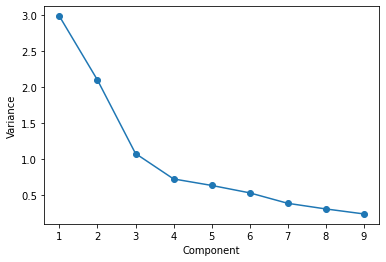

In [68]:
# scree(스크리) 도면
# PCA를 분석할 때 중요한 도면
# 각 성분히 추가하는 추가 분산의 연속적인 비율을 보여줌

plt.plot(
    1+np.arange(len(brand_pca.explained_variance_)),
    brand_pca.explained_variance_, 'o-'
)
plt.xlabel('Component')
plt.ylabel('Variance')

In [51]:
# 스크리 도면은 종종 추가 성분이 복잡도에 기여하지 않음을 나타내는 것으로 해석된다.
# 이것은 선에 엘보우, 굽힘 각도의 꼬임 형태로 나타나느데 다소 주관적으로 판단한다.

# 엘보우는 해석에 따라 성분 3이나 4에서 발생한다. 
# 이는 처음 2~3개의 성분이 관찰된 브랜드 등급의 대부분의 변화를 설명하나는 것을 의미한다. 

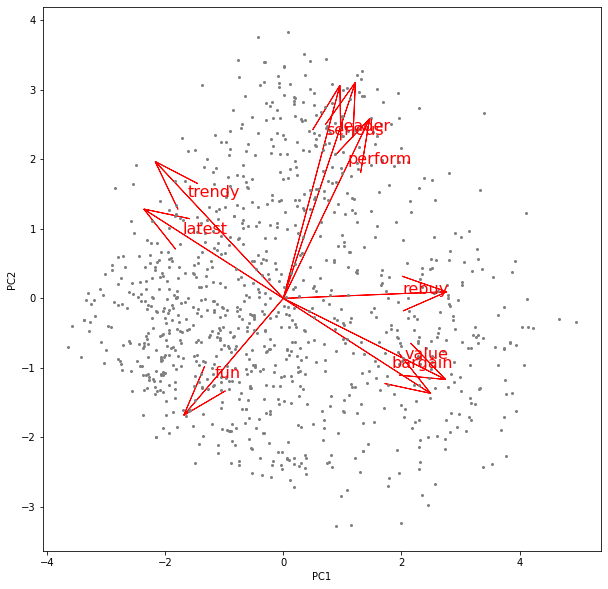

In [69]:
brand_ratings_sc_trans = brand_pca.transform(brand_ratings_sc_vals)
brand_pca_components = pca_components(brand_pca, brand_ratings_names)
biplot(brand_ratings_sc_trans, brand_pca_components)

# 형용사는 4개의 구역으로 나누어짐.
# 하지만 개별 응답자의 평가 도면이 너무 조밀하고, 브랜드 위치에 대해서는 알려주는 바가 없다.
# 더 나은 해법은 브랜드별로 집계된 등급을 표시하는 행렬도를 구성하는 것. 

## 브랜드의 지각도

In [73]:
brand_means_sc = brand_ratings_sc.groupby('brand').mean()
brand_means_sc

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,-0.886362,-0.528168,0.411179,0.656974,-0.919400,0.214203,0.184785,-0.525407,-0.596465
b,0.931336,1.071294,0.726470,-0.972701,1.183733,0.041640,0.151415,0.740679,0.237092
c,0.650249,1.163350,-0.102388,-0.845098,1.223346,-0.607347,-0.440898,0.025541,-0.132504
d,-0.680231,-0.593373,0.352671,0.186665,-0.692521,-0.881197,-0.933102,0.737030,-0.494236
e,-0.564673,0.192933,0.456685,0.296039,0.042135,0.551826,0.418373,0.138649,0.036566
f,-0.058716,0.269645,-1.262790,-0.218019,0.589525,0.874444,1.023200,-0.813652,1.357675
g,0.918843,-0.167617,-1.285543,-0.516975,-0.534066,0.896953,1.256789,-1.277032,1.361607
h,-0.014991,-0.298029,0.502191,0.715307,-0.141529,-0.738645,-0.782938,0.864733,-0.604328
i,0.334806,-0.321043,0.355922,0.412705,-0.148732,-0.254718,-0.803794,0.591083,-0.203278


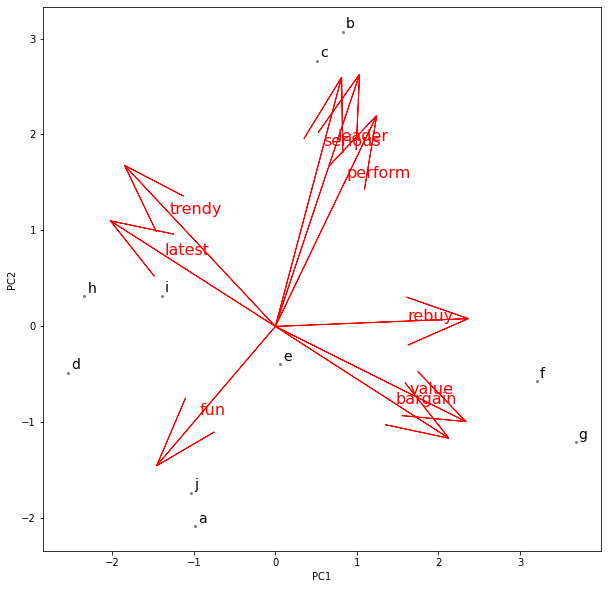

In [74]:
# 데이터 크기 다시 조정
# 원시 데이터가 이미 재조정되었지만, 집계된 평균은 표준화된 데이터 자체와는 다소 다른 크기를 갖고있다.

brand_means_sc = (
    (brand_means_sc - brand_means_sc.mean())/brand_means_sc.std()
)

brand_means_sc_transformed = brand_pca.transform(brand_means_sc)
biplot(
    brand_means_sc_transformed, brand_pca_components, label=brand_means.index
)

In [75]:
brand_means_sc.loc['c'] - brand_means_sc.loc['e']

perform    1.775362
leader     1.440484
latest    -0.774450
fun       -1.886670
serious    1.544750
bargain   -1.811159
value     -1.131735
trendy    -0.151604
rebuy     -0.212361
dtype: float64

In [76]:
brand_means_sc.loc[['b','c','f','g']].mean(axis=0) - brand_means_sc.loc['e']

perform    1.717172
leader     0.580749
latest    -1.299004
fun       -1.544598
serious    0.750005
bargain   -0.391245
value      0.104383
trendy    -0.629646
rebuy      0.840802
dtype: float64

In [77]:
# PCA 시각화는 서로 다른 점을 이해하는 데 유용한 도구이다. 

# 탐색적 요인 분석 (EFA)

In [78]:
# Exploratory Factor Analysis
# 설문 조사와 심리 평가에서 구성체(개념) 사이의 관계를 평가하는 기술군.
# 요인(factor)은 직접 관찰할 수 없지만, 다른 변수와의 관계를 통해 불완전하게 평가되는 잠재변수로 간주됨 (manifest 변수)

In [ ]:
# 이 절에서는 EFA를 이용하여 앞의 브랜드 등급 데이터를 사용함으로써
# 브랜드에 대한 응답자 태도를 조사하고 데이터의 잠재 차원 파악.
# 그런 다음 추정된 잠재 요인 측면에서 브랜드를 평가. 

## 기본 EFA 개념

In [79]:
# EFA 결과는 PCA와 유사함.
# 요인 행렬(PCA 성분과 유사)과 원시 변수와의 관계(변수에 대한 요인 적재)이다.  

# PCA와 달리 EFA는 매니페스트 변수 측면에서 최대한 해석 가능한 솔루션을 찾으려고 한다.
# 일반적으로 각 요인에 대해 소수의 적재는 매우 높고 해당 요인에 대한 다른 적재는 낮은 솔루션을 찾으려고 함.
# 이것이 가능하면 그 요인은 그 작은 변수 집합의 관점에서 해석될 수 있음.

In [80]:
###################### EFA는 3가지 넓은 의미에서 데이터 축소 기술로 사용됨.##############################################################
# 1. 차원 축소의 기술적 의미에서 더 큰 항목 집합 대신 요인 점수를 사용할 수 있다.
#    예를 들어 만족도를 평가하는 경우 여러 개별 항목 대신 단일 만족도 점수를 사용할 수 있다.
# 2. 불확실성을 줄일 수 있다. 만족이 여러 측정에서 불안전하게 나타난다고 생각한다면, 
#    개별 항목 집합보다 잡음이 적을 것이다.
# 3. 관심 요인에 높은 기여를 하는 것으로 알려진 항목에 초점을 맞춰 데이터 수집을 줄일 수 있다.
#    일부 항목이 관심 요소에 중요하지 않음을 발견하면 데이터 수집 노력에서 해당 항목을 삭제할 수 있다.

In [81]:
# 이 장에서는 브랜드 평가 데이터를 사용해
# "잠재 요인이 얼마나 많은가?"
# "설문 조사 항목이 요인에 어떻게 매핑되는가?"
# "브랜드는 요인에 어떻게 배치돼 있는가?"
# "응답자의 요인 점수는 무엇인가?"
# 와 같은 질문을 한다. 

## EFA 솔루션 찾기

In [82]:
# 1. 탐색적 요인 분석의 첫 번째 단계 -> 추정할 요인의 수를 결정

In [83]:
# 고유값 1.0은 단일 독립 변수에 기인할 수 있는 분산의 양에 해당한다.
# 그러한 항목보다 더 적은 분산을 포착하는 요인은 상대적으로 흥미롭지 않은 것으로 간주될 수 있다.

In [85]:
import numpy as np
np.linalg.eig(np.corrcoef(brand_ratings_sc_vals.T))[0]

array([2.97929556, 2.09655168, 1.07925487, 0.72721099, 0.63754592,
       0.53484323, 0.39010444, 0.24314689, 0.31204642])

In [87]:
# 어떤 모델이 더 유용한지 3요인 솔루션과 2요인 솔루션을 테스트
# sklearn 요인 분석 모듈 sklearn.decomposition.FactorAnalysis()
# 기능이 약간 제한되어 있어 필요한 경우 pip를 사용해 설치할 수 있는 factor_analyzer 패키지 사용

!pip install factor_analyzer

     |████████████████████████████████| 41 kB 2.4 MB/s  eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 202 kB 9.9 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 14.9 MB/s eta 0:00:01
     |████████████████████████████████| 8.7 MB 31.4 MB/s eta 0:00:01
     |████████████████████████████████| 468 kB 20.5 MB/s eta 0:00:01
  Created wheel for factor-analyzer: filename=factor_analyzer-0.4.1-py2.py3-none-any.whl size=42014 sha256=eb5583959889224617cf36ca61c718441401dee5efa6881c6c4dcb2ab9988d59
  Stored in directory: /Users/wonbinchoi/Library/Caches/pip/wheels/6d/32/bd/460a71becd83f7d77152f437c2fd451f5c87bc19cfcdbfcd24
Successfully built factor-analyzer


In [89]:
# 2요인 솔루션
# 요인 0은 할인과 가치에 강하게 적재되므로 가치
# 요인 1은 리더와 대단함 요소에 적재되므로 카테고리 리더 요소로 간주됨
import factor_analyzer

fa = factor_analyzer.FactorAnalyzer(n_factors=2, rotation='varimax')
fa.fit(brand_ratings_sc_vals)
pd.DataFrame(fa.loadings_, index=brand_ratings_names).round(2)



,0,1
perform,0.09,0.60
leader,-0.02,0.81
latest,-0.59,-0.04
fun,-0.19,-0.39
serious,-0.07,0.68
bargain,0.69,0.05
value,0.78,0.11
trendy,-0.65,0.10
rebuy,0.60,0.33


In [94]:
# 3요인 모델이 2요인 모델보다 더 우수함
# why? 요인이 더 해석 가능하기 때문에. 
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='varimax')
fa.fit(brand_ratings_sc_vals)
pd.DataFrame(fa.loadings_, index=brand_ratings_names).round(2)

# 요인 1: 가치
# 요인 2: 리더
# 요인 3: 최신

,0,1,2
perform,0.07,0.60,-0.06
leader,0.06,0.80,0.10
latest,-0.16,-0.08,0.98
fun,-0.07,-0.41,0.21
serious,-0.01,0.68,0.08
bargain,0.84,-0.00,-0.11
value,0.85,0.08,-0.21
trendy,-0.35,0.08,0.59
rebuy,0.50,0.32,-0.30


## EFA 로테이션

In [96]:
# 요인 분석 솔루션은 "동일한 분산 비율을 설명하는 새로운 적재를 갖도록" 회전할 수 있음.
# EFA에서 고려할 가치가 있는 한가지 문제 -> 요인이 서로 상관되도록 허용하겠는가?

# EFA는 기본 잠재 차원에 중점을 두는 반면 PCA는 데이터의 차원 변환에 중점을 둔다.

# 현재 데이터로 돌아와서 가치와 리더가 관련될 것으로 합리적으로 예상된다고 판단할 수 있음.
# 많은 범주에서 리더는 가격 프리미엄을 요구할 수 있음.
# 따라서 여기서는 이 두 가지 잠재 구조가 서로 독립적이지 않고 음의 상관관계를 가질 것으로 예상할 수 있음.
# 이는 솔루션에서 상관 요인을 허용할 수 있음을 의미함.
# -> 비스듬한 회전 (oblique)

In [99]:
# 일반적인 비스듬한 회전 -> oblimin 회전 

fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='oblimin')
fa.fit(brand_ratings_sc_vals)
fa_loadings_df = pd.DataFrame(fa.loadings_,
                              index=brand_ratings_names)
fa_loadings_df.round(2)

# 배리맥스 회전과 비교할 때 적재가 요인과 형용사의 관계에 대해 약간 다르다는 것을 알 수 있음.
# 그러나 이 경우 적재는 충분히 유사해 요인을 해석하는 방법에 큰 변화가 없다.
# 가치, 리더, 최신 에 대한 요인은 여전히 있음.

,0,1,2
perform,0.01,0.60,-0.09
leader,0.02,0.81,0.07
latest,0.03,-0.00,1.01
fun,0.00,-0.39,0.24
serious,-0.05,0.68,0.03
bargain,0.88,-0.05,0.07
value,0.86,0.03,-0.04
trendy,-0.26,0.14,0.54
rebuy,0.45,0.28,-0.22


In [101]:
# 추정된 잠재 요인 간의 관계를 보여주는 요인 상관 행렬을 확인할 수 있음.
# 요인 1은 요인 3과 음의 상관관계가 있으면 본질적으로 요인 2(리더) 와는 상관관계가 없다. 

np.corrcoef(fa.transform(brand_ratings_sc_vals).T)

# 요인 1과 3의 음의 상관관계는 가치 브랜드가 트렌디할 가능성이 적다는 우리의 이론과 일치하므로
# 더 해석 가능한 결과라고 생각한다. 

# 다른 경우에는 상관 회전이 직교 회전보다 더 나은 솔루션이 될 수도 있고 그렇지 않을 수도 있음.
# 그것은 통계보다는 영역 지식과 해석적 유용성을 바탕으로 결정돼야 할 문제이다. 

array([[ 1.        ,  0.12904598, -0.41410012],
       [ 0.12904598,  1.        , -0.04888392],
       [-0.41410012, -0.04888392,  1.        ]])

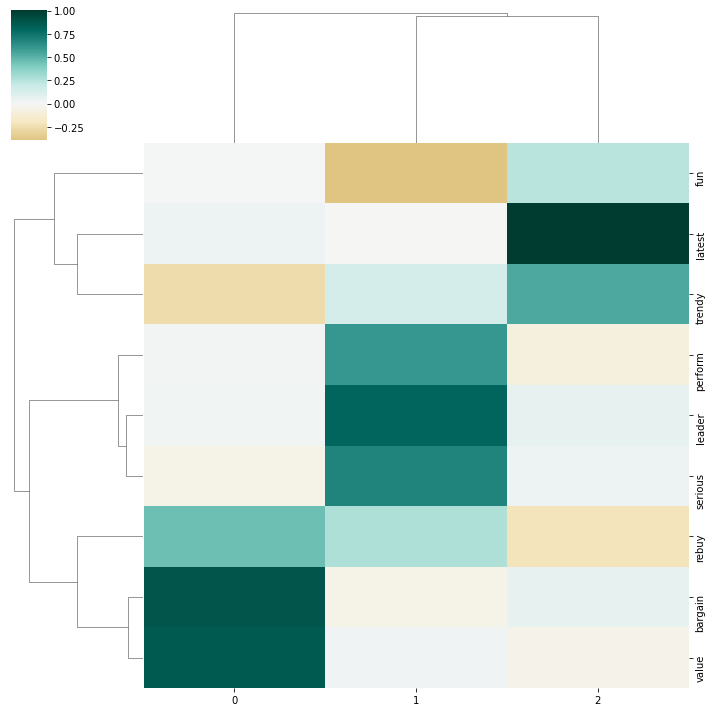

In [102]:
# 위의 출력에는 항목 대 요인 item-to-factor 적재가 표시됨.
# 반환된 모델 객체에서 이들은 로딩 매개변수로 나타난다.
# 그런 다음 로딩의 클러스터 맵을 사용해 항목 요소 관계를 시각화할 수 있다.

sns.clustermap(fa_loadings_df, cmap=cm.BrBG, center=0)

In [103]:
# 해당 그림은 항목이 세가지 요소로 뚜렷하게 구분돼 있으며 대략 가치, 리더, 최신으로 해석할 수 있다.
# 명시된 재구매 의도(rebuy)를 반영하는 품목 재구매는 요인 1과 요인 2 모두에 적재됨
# 시뮬레이션 데이터는 소비자는 브랜드가 좋은 가치 혹은 리더이기 때문에 어떤 이유로든 브랜드를 다시 구매할 것이라는 사실을 알 수 있음.

In [104]:
#################################################
# 전반적으로 이 데이터셋에 대한 EFA의 결과는 9개의 개별 변수를 사용하는 대신
# 3개의 기본 잠재 요인으로 데이터를 나타낼 수 있다는 것이다. 

# 각 요인이 매니페스트 변수의 2~4개에 매핑되는 것을 확인했다.
# 그러나 이것은 데이터에서 평가 변수들 사이의 관계만을 알려줌

# 다음 절에서는 추정 요인 점수를 사용해 브랜드에 대해 알아보자

## 브랜드에 요인 점수 사용

In [105]:
fa = factor_analyzer.FactorAnalyzer(n_factors=3, rotation='oblimin')
brand_ratings_fa_trans = fa.fit_transform(brand_ratings_sc_vals)
brand_rating_fa_scores = pd.DataFrame(brand_ratings_fa_trans)
brand_rating_fa_scores['brand'] = brand_ratings_sc.brand
brand_rating_fa_scores.head()

,0,1,2,brand
0,1.388590,-0.491354,0.531693,a
1,-1.188916,-1.352280,-0.658905,a
2,1.038597,-0.801256,-0.372207,a
3,0.037803,-0.318029,1.190962,a
4,1.688281,-1.525753,-0.453958,a


In [108]:
# 결과는 각 요인과 브랜드에 대한 각 응답자의 추정 점수이다.
# 인구 통계나 구매 행동과의 관계 같은 요인의 개별 수준 상관관계를 조사하려면 이러한 요인 점수 추정치를 사용할 수 있음 (여기서는 fit_transform)

# 이는 모델 복잡도(차원 수)를 줄이고 좀 더 신뢰할 수 있는 추정값(여러 매니페스트 변수를 반영하는 요인 점수)을 사용하기 때문에
# 회귀와 세분화와 같은 분석에 매우 유용할 수 있다. 여기서는 9개 항목 대신 세 가지 요인이 있다.

brand_rating_fa_mean = brand_rating_fa_scores.groupby('brand').mean()
brand_rating_fa_mean.columns = ['Value', 'Leader', 'Latest']
brand_rating_fa_mean.round(3)

,Value,Leader,Latest
brand,,,
a,0.147,-0.863,0.388
b,0.067,1.205,0.710
c,-0.492,1.120,-0.077
d,-0.921,-0.625,0.368
e,0.416,-0.035,0.437
f,1.048,0.406,-1.265
g,1.236,0.086,-1.326
h,-0.804,-0.271,0.528
i,-0.555,-0.169,0.388


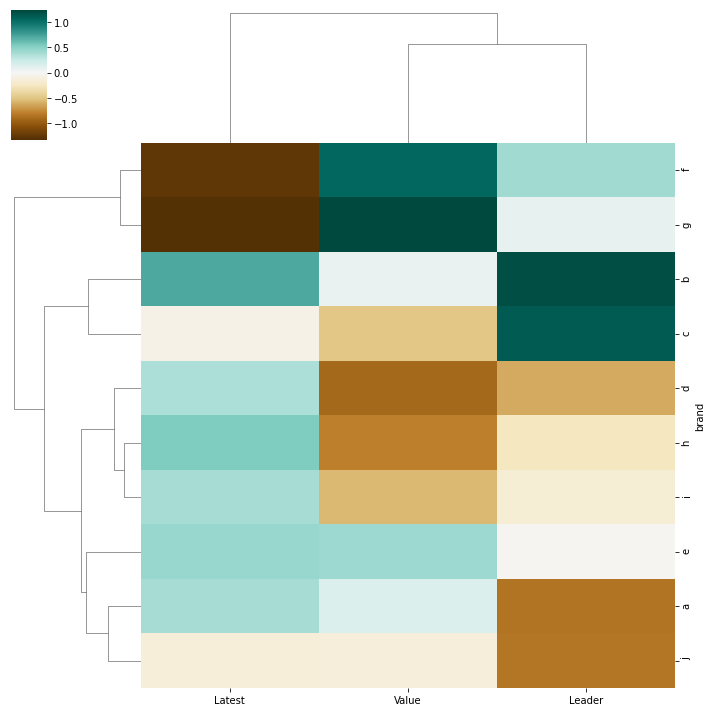

In [110]:
sns.clustermap(brand_rating_fa_mean, cmap=cm.BrBG, center=0)

In [111]:
# 이를 통해 EFA가 변수의 기본 구조와 관계를 조사하는 귀중한 방법이라는 결론을 내린다.
# 항목이 기본 구성체와 관련된 경우 EFA는 변수를 집계해 더 간단하고 해석 가능한 잠재 변수를 생성함으로써 "데이터 복잡성을 줄인다."

# 다차원 척도법

In [112]:
# MDS 은 데이터의 저차원 표현을 찾는데도 사용할 수 있는 제품군이다.
# 기저성분이나 잠재 요인을 추출하는 대신 MDS는 거리 행렬(distance matrix) 혹은 유사성 행렬(similarity matrix)을 사용한다
# MDS는 항목 간에 관찰된 모든 유사성을 가장 잘 보존하는 저차원 지도를 찾으려고 한다.

In [114]:
# 쌍별 유클리드 거리를 계산한 다음 저차원 표현을 찾는다.

from sklearn import manifold

np.random.seed(889783)
brand_mds = manifold.MDS().fit_transform(brand_means)
brand_mds

# MDS.fit_transform()의 결과는 개체에 대한 2차원 추정 도명 좌표를 나타내는 X및 Y 차원 리스트

array([[ 0.59217926,  5.19146726],
       [-2.74412002, -6.30675543],
       [-0.51645595, -5.64921129],
       [-4.33444294,  3.51765049],
       [ 0.69182752,  0.80286252],
       [ 6.14100233, -2.84581818],
       [ 8.40903503, -0.33459353],
       [-4.67731306,  1.14429619],
       [-3.16204417,  0.12390567],
       [-0.399668  ,  4.35619632]])

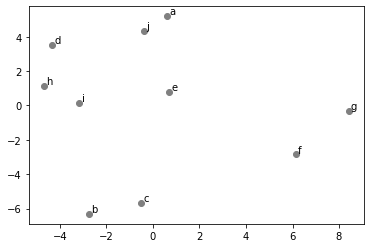

In [118]:
# 평균 브랜드 등급에 대한 다차원 척도 차트
# 브랜드 위치는 biplot과 매유 유사. 

plt.scatter(
    x=brand_mds[:,0],
    y=brand_mds[:,1],
    color='grey'
)
for i,p in enumerate(brand_mds):
    plt.annotate(text=brand_means.index[i], xy=p+.1)

## 비측도 MDS

In [140]:
# 순위나 범주형 변수와 같은 비측도 데이터의 경우 metric=False 인수를 전달

# 설명을 위해 평균 평점을 원시 값 대신 순위로 변환하기
# 이것은 측도가 아닌 서수 데이터.
# 전체 등급이 아닌 각 결과 열을 순위로 코딩하는 apply()를 사용해 열에 argsort()를 적용

brand_ranks = brand_means.apply(lambda col: col.argsort().argsort())
brand_ranks

,perform,leader,latest,fun,serious,bargain,value,trendy,rebuy
brand,,,,,,,,,
a,0,2,6,8,0,6,6,2,2
b,9,8,9,0,8,5,5,8,7
c,7,9,3,1,9,2,3,4,5
d,1,1,4,4,1,0,0,7,3
e,3,6,7,6,6,7,7,5,6
f,4,7,1,3,7,8,8,1,8
g,8,5,0,2,3,9,9,0,9
h,5,4,8,9,5,1,2,9,1
i,6,3,5,7,4,3,1,6,4


In [141]:
brand_mds_nonmetric = manifold.MDS(metric=False).fit_transform(brand_ranks)

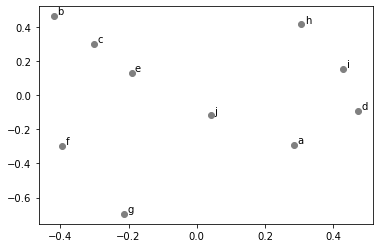

In [142]:
# 비측도 솔루션의 브랜드 위치는 상당히 다르지만,
# 가장 가까운 이웅ㅅ 브랜드는 측도 솔루션보다 훨씬 더 분리된 브랜드 b와 c를 제외하고는 대체로 일관성이 있다.

plt.scatter(
    x=brand_mds_nonmetric[:,0],
    y=brand_mds_nonmetric[:,1],
    color='grey'
)

for i,p in enumerate(brand_mds_nonmetric):
    plt.annotate(text=brand_means.index[i], xy=p+.01)

In [143]:
# PCA는 비측도 데이터에 대해서는 작동하지 않기 때문에,
# 비측도 데이터는 MDS nonmetric을 활용하기

In [144]:
#######################################
# 다차원 척도법 MDS는 소비자의 피드백, 의견, 온라인 제품 리뷰와 같은 텍스트 데이터를 처리할 때 특히 유용할 수 있다.
# 텍스트 빈도는 거리 점수로 변환될 수 있다.
# 예를 들어, 온라인 리뷰에서 브랜드 간의 유사성에 관심이 있다면 소비자의 게시물에서 다양한 브랜드 쌍이 함께 나타나는 횟수를 계산할 수 있다.

## 저차원 임베딩을 사용한 시각화

In [145]:
# 고차원 데이터를 시각화하는 것은 어려움 -> 사실상 2차원으로 제한돼 있기 때문
# PCA를 사용해 차원을 2차원으로 줄일 수 있지만 결과 산점도는 종종 해석하기가 매우 어려움.
# 2차원으로 고차원 구조를 나타내는 시각화에 명시적으로 맞춤화된 몇 가지 비선형 차원 축소 도구들이 있음.

### t-SNE

In [146]:
# 주로 신경망 아키텍처에서 학습한 높은 수준의 표현 등과 같은 고차원 시스템을 시각화하는 데 사용되는 비선형 차원 기술
# 특정 매개변수에 민감하고 확률적이므로 실행될 때마다 표현이 달라짐. 
# 그러나 데이터에서 고차원 구조를 강조하는 데는 탁월함.

In [147]:
brand_tsne = manifold.TSNE().fit_transform(brand_ratings_sc_vals)
brand_tsne_df = pd.DataFrame(brand_tsne, columns=['x', 'y'])
brand_tsne_df['brand'] = brand_ratings_sc.brand

/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/wonbinchoi/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


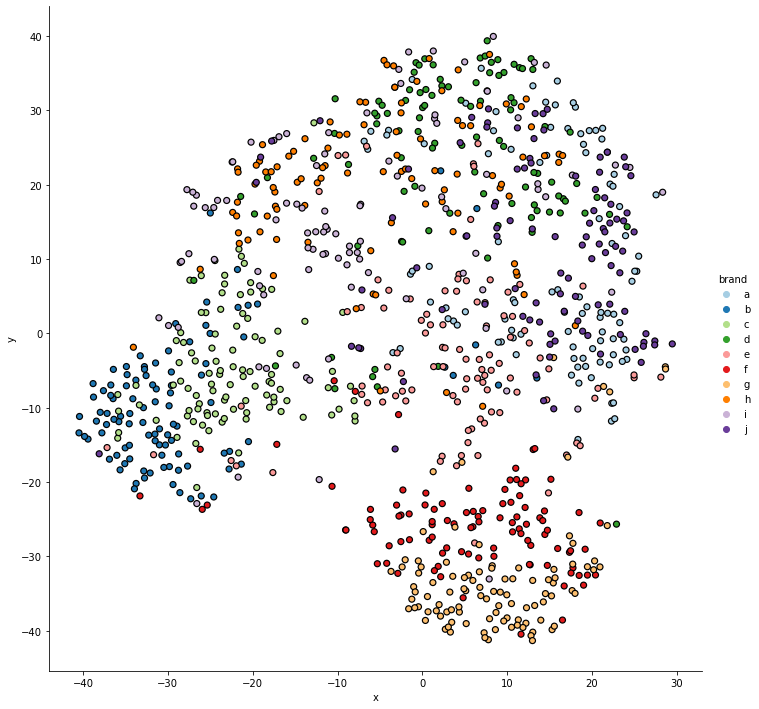

In [168]:
# 각 응답을 t-SNE 적합화 공간으로 변환
# 모든 포인트의 산점도에 브랜드를 겹치면, 서로 다른 브랜드의 상대적 위치를 볼 수 있음.

sns.pairplot(
    brand_tsne_df, 
    x_vars=['x'],
    y_vars=['y'],
    hue='brand',
    palette=sns.color_palette('Paired', n_colors=10),
    height=10, plot_kws=dict(edgecolor="k", linewidth=1.2)
)

### UMAP

In [169]:
# 유사한 기술
# 고차원 구조를 2차원으로 시각화하기 위한 또 다른 차원 축소 기술

In [172]:
import umap

umap.get

AttributeError: module 'umap' has no attribute 'UMAP'